In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ml_data\blackfriday\train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [20]:
null_values=df.isnull().sum()

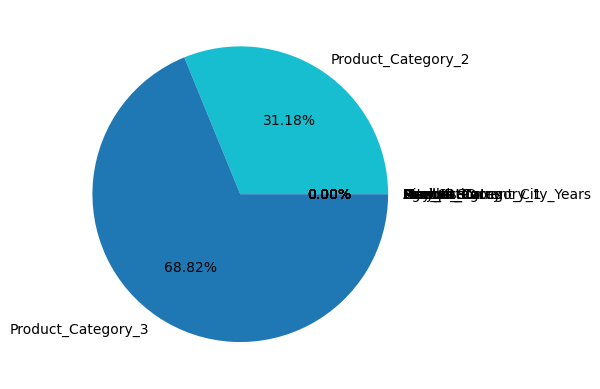

In [23]:
plt.pie(null_values,labels=null_values.keys(),autopct="%1.2f%%")
plt.show()

In [24]:
## As we can see in product category2 and product category 3 had most number of null values

In [25]:
# fill the null values
df.fillna(df['Product_Category_2'].mean(),inplace=True)
df.fillna(df['Product_Category_3'].mean(),inplace=True)

In [26]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

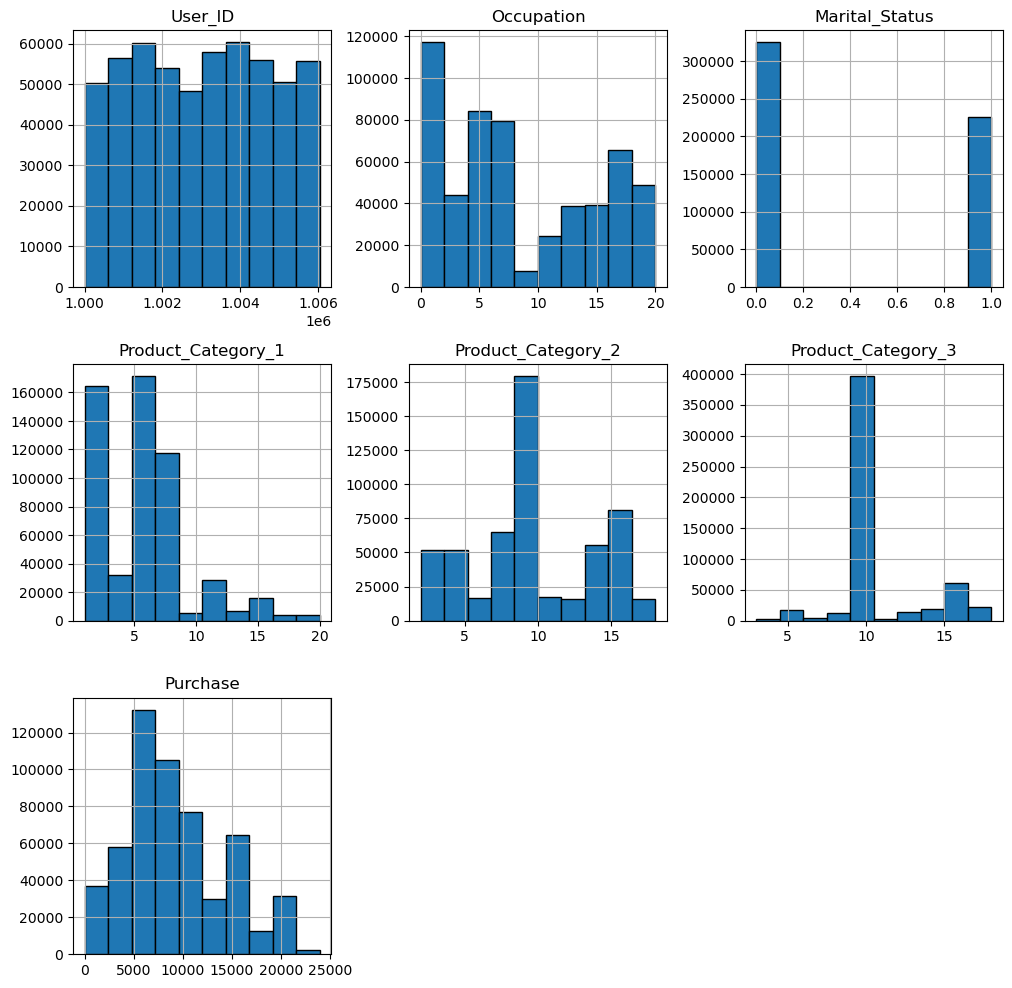

In [27]:
df.hist(edgecolor='black',figsize=(12,12));

In [28]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

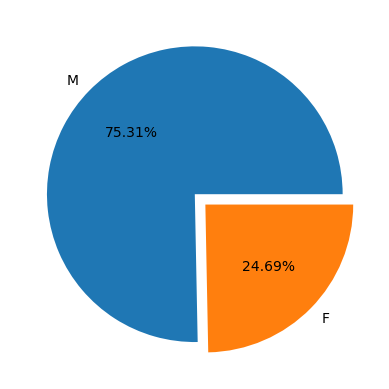

In [31]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().keys(),explode=[0,0.1],autopct="%1.2f%%")
plt.show()

In [32]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<Axes: ylabel='Age'>

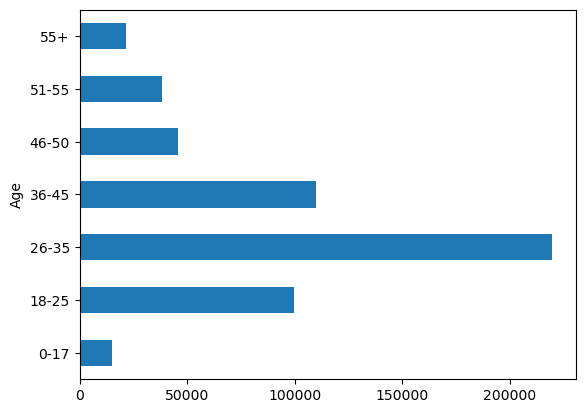

In [39]:
df.groupby('Age')['Purchase'].size().plot(kind='barh')

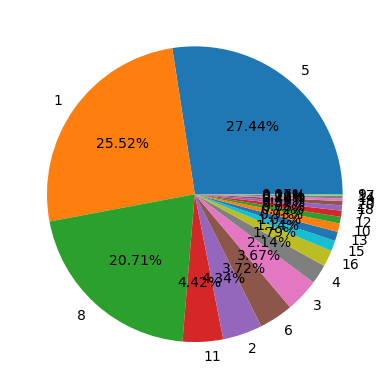

In [48]:
plt.pie(df['Product_Category_1'].value_counts(),labels=df['Product_Category_1'].value_counts().keys(),autopct='%1.2f%%')
plt.show()

In [50]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [52]:
# Handling the categorical features
df_gender=pd.get_dummies(df['Gender'])
df_Age=pd.get_dummies(df['Age'])
df_Stay_In_Current_City_Years=pd.get_dummies(df['Stay_In_Current_City_Years'])

In [55]:
df_city=pd.get_dummies(df['City_Category'])

In [58]:
# we get dummy data we add into original data using 
df1=pd.concat([df,df_gender,df_Age,df_Stay_In_Current_City_Years,df_city],axis=1)

In [59]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,51-55,55+,0,1,2,3,4+,A,B,C
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,...,0,0,0,0,1,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,...,0,0,0,0,1,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,...,0,0,0,0,1,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,...,0,0,0,0,1,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,...,0,1,0,0,0,0,1,0,0,1


In [60]:
#Now we drop the original columns
df1.drop(['Gender','Age','Stay_In_Current_City_Years','City_Category'],axis=1,inplace=True)

In [61]:
df1.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,...,51-55,55+,0,1,2,3,4+,A,B,C
0,1000001,P00069042,10,0,3,9.842329,9.842329,8370,1,0,...,0,0,0,0,1,0,0,1,0,0
1,1000001,P00248942,10,0,1,6.000000,14.000000,15200,1,0,...,0,0,0,0,1,0,0,1,0,0
2,1000001,P00087842,10,0,12,9.842329,9.842329,1422,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1000001,P00085442,10,0,12,14.000000,9.842329,1057,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1000002,P00285442,16,0,8,9.842329,9.842329,7969,0,1,...,0,1,0,0,0,0,1,0,0,1


In [63]:
df1.dtypes

User_ID                 int64
Product_ID             object
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
A                       uint8
B                       uint8
C                       uint8
dtype: object

In [74]:
df1.dtypes

User_ID                 int64
Product_ID             object
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
A                       uint8
B                       uint8
C                       uint8
dtype: object